In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split;

if tf.__version__ < "2.0.0":
  !pip install --upgrade tensorflow_gpu==2.0

%matplotlib inline

# Data Preparation

In [29]:
cols = list(pd.read_csv("legitimate_phishing_structured_dataset.csv", nrows=1))

data = pd.read_csv('legitimate_phishing_structured_dataset.csv', usecols=lambda col: col != 'URL')

classification_map = {
    '0': 'legitimate',
    '1': 'phishing'
}

feature_cols = [i for i in cols if i not in ['URL', 'label']]

print(data['label'].value_counts())

label
0    25000
1    25000
Name: count, dtype: int64


In [30]:
feature_cols = [i for i in feature_cols if i not in ['has_title', 'has_link', 'length_of_title', 'has_h2', 'has_h3', 'has_footer', 'has_nav']]
X = data[feature_cols]
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

# Prediction (Sequential)

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(128, input_dim=len(feature_cols), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

model.summary()

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7520 - loss: 16.4002 - val_accuracy: 0.8551 - val_loss: 2.8115
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8358 - loss: 4.1844 - val_accuracy: 0.8707 - val_loss: 1.0823
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8421 - loss: 3.2182 - val_accuracy: 0.8716 - val_loss: 0.9972
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8459 - loss: 3.1226 - val_accuracy: 0.8746 - val_loss: 0.5267
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8307 - loss: 3.0828 - val_accuracy: 0.8701 - val_loss: 0.4067
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8485 - loss: 1.2721 - val_accuracy: 0.8661 - val_loss: 1.2603
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8523 - loss: 1.1682 - val_accuracy: 0.8673 - val_loss: 0.3512
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8644 - loss: 0.5209 - val_accuracy: 0.8749 - val

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                     │ (None, 128)                 │           4,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 39,173 (153.02 KB)

 Trainable params: 13,057 (51.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 26,116 (102.02 KB)

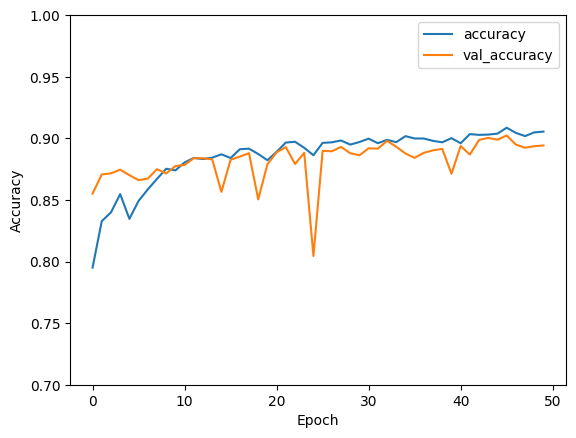

In [32]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.7, 1])
plt.legend(loc='best')

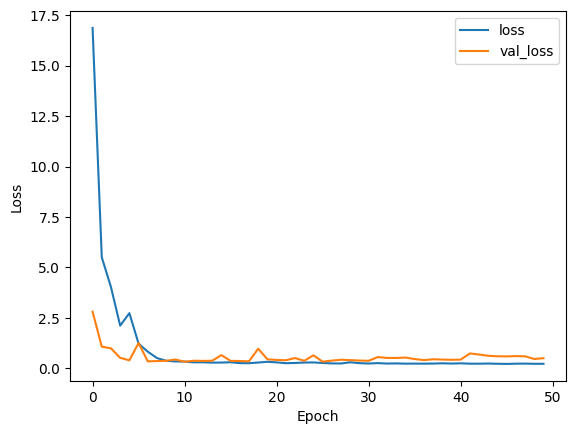

In [33]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

# Prediction (Convolutional Neural Network)

In [34]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(len(feature_cols), 1)))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

model.summary()

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.7589 - loss: 14.5509 - val_accuracy: 0.8571 - val_loss: 1.6267
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8372 - loss: 1.5952 - val_accuracy: 0.8709 - val_loss: 0.7930
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8349 - loss: 1.3343 - val_accuracy: 0.8800 - val_loss: 0.3979
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.8683 - loss: 0.4375 - val_accuracy: 0.8477 - val_loss: 0.3999
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8676 - loss: 0.6453 - val_accuracy: 0.8810 - val_loss: 0.3044
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8798 - loss: 0.3355 - val_accuracy: 0.8752 - val_loss: 0.4402
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8883 - loss: 0.2953 - val_accuracy: 0.8844 - val_loss: 0.2819
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8910 - loss: 0.2619 - val_accuracy: 0.88

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)                    │ (None, 34, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ (None, 17, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 15, 64)              │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_5 (MaxPooling1D)       │ (None, 7, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 448)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 128)                 │          57,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 191,813 (749.27 KB)

 Trainable params: 63,937 (249.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 127,876 (499.52 KB)

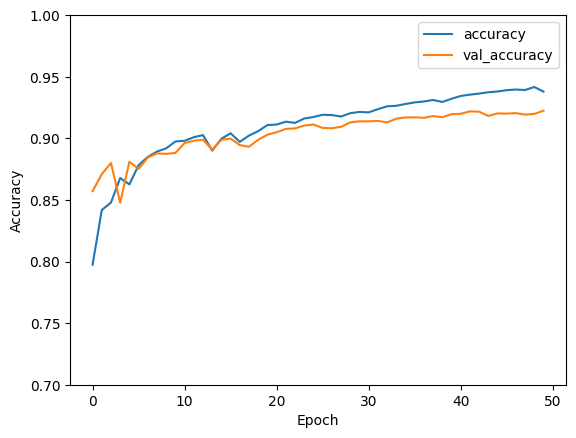

In [35]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.7, 1])
plt.legend(loc='best')

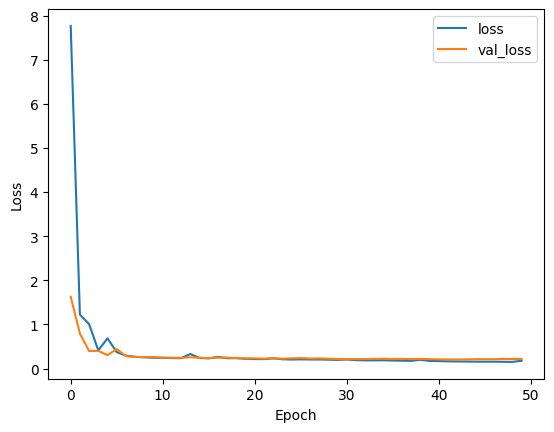

In [36]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

# Conclusions

## Key Findings
### Model Performance:

Compared to the initial machine learning models used, both neural were found to have lower accuraccy. In training each neural netowork 100 epochs were used to train the model, however, after analyzing the learning curves the curves began to diverge and around 50 epochs, the models were then both retrained with only 50 epochs.

The simple deep neural network achieved an accuracy of 90% compared to the convolutional neural network which achieved 94% accuracy. Using a convolutional neural network would thus be a more optimal choice for this dataset.

As compared to previous traditional models that were used, both neural network learning curves were much more convergent, suggesting that the models were well fit to the data, and would not need to see a significant amount more data to be well fit like the traditional models.

## Final Thoughts
Both models performed very well, although the accuracies were lower when compared to the previously used models (90% and 94% compared to 95% and 94%), the neural netowrk models were better fit to the data and we would be able to see a significant improvement on predictions on new data coming into the system.
Overall, comparing all tested models, a convolutional neural network would be the most optimal choice for this task.